In [ ]:
!pip install theano

In [22]:
import theano

In [16]:
!pip install conda

In [21]:
!pip install m2w64-toolchain

  Could not find a version that satisfies the requirement m2w64-toolchain (from versions: )
No matching distribution found for m2w64-toolchain


In [25]:
from theano import tensor as t
a = t.scalar()
b = t.scalar()
c = a*b
#Define a function which computes numeric values using these functions
mul = theano.function(inputs=[a,b],outputs=c)
#Execute the function on the data
multiply = mul(3,2)
print(multiply)

6.0


In [26]:
!pip install sklearn

In [32]:
!pip install Quandl

In [1]:
import pandas as pd
import quandl
import math
import numpy as np
import sklearn
import datetime 
import pickling 
#from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn import preprocessing, cross_validation, svm #SVM is useful for regression
from sklearn.linear_model import LinearRegression
df = quandl.get('WIKI/GOOGL')
#Linear Regression and predicting forecast

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
df = df[['Adj. Volume','Adj. Close','Adj. Low','Adj. High','Adj. Open',]]

df['HL_PCT'] = (df['Adj. High']-df['Adj. Close'])/df['Adj. Close']*100.0

df['PCT_Change'] =(df['Adj. Close']-df['Adj. Open'])/df['Adj. Open']*100.0 

df = df[['Adj. Close', 'HL_PCT', 'PCT_Change',  'Adj. Volume']]

print(df.head())

forecast_col = 'Adj. Close'
#Remove non-available dataset
df.fillna(-9999,inplace=True)

forecast_out = int(math.ceil(0.01*len(df)))

df['label'] = df[forecast_col].shift(-forecast_out)

df.dropna(inplace=True)

print(df.tail())

            Adj. Close    HL_PCT  PCT_Change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0
            Adj. Close    HL_PCT  PCT_Change  Adj. Volume   label
Date                                                             
2017-03-30      849.48  0.296652   -0.293434     949398.0  942.17
2017-03-31      847.80  0.207596    0.114545    1440982.0  950.50
2017-04-03      856.75  0.262620    0.942563    1969402.0  954.65
2017-04-04      852.57  0.050436    0.538915    1348494.0  964.07
2017-04-05      848.91  1.375882   -0.678593    1855153.0  970.55


            Adj. Close    HL_PCT  PCT_Change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  68.752232
2004-08-20   54.322689  0.710922    7.227007   22834300.0  69.639972
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  69.078238
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  67.839414
2004-08-25   53.164113  1.886792    1.183658    9188600.0  68.912727
0.97586994003
[ 854.74926124  858.89347804  861.52234447  863.65048558  863.3219862
  860.25009897  862.18247872  857.07873747  868.82621191  861.85489149
  861.57828823  859.75340018  863.54926123  865.97781673  870.0152187
  873.64520004  876.87074521  878.34646715  880.72425916  882.34755624
  884.40500252  880.07987129  860.14219436  861.77300663  851.02769971
  846.53346723  850.34356507  852.59900142  862.070568    861.96415512
  860.07469037  868.63315948  864.96550755] 0.97586994003 33


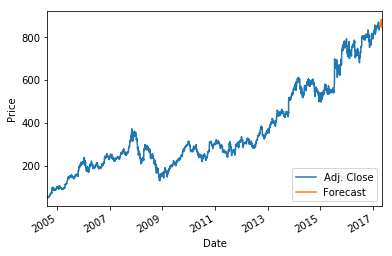

In [126]:
x = np.array(df.drop(['label'],1))
y = np.array(df['label'])
x = preprocessing.scale(x)
x_lately = x[-forecast_out:]



df.dropna(inplace = True)

print(df.head())

x_train, x_test, y_train, y_test = cross_validation.train_test_split(x,y, test_size = 0.2)
clf = LinearRegression()
clf.fit(x_train,y_train)
accuracy = clf.score(x_test,y_test)
print(accuracy)
forecast_set = clf.predict(x_lately)
print(forecast_set,accuracy,forecast_out)

df['Forecast'] = np.nan
last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix +=  one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i]

    
df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc = 4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()